In [2]:
from SeismicReduction import *
import pickle

In [3]:
### Client loader
# set_seed(42)
# dataholder = DataHolder("Glitne", [1300, 1502, 2], [1500, 2002, 2])
# dataholder.add_near('./data/3d_nearstack.sgy');
# dataholder.add_far('./data/3d_farstack.sgy');
# dataholder.add_horizon('./data/Top_Heimdal_subset.txt')

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [4]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], crop=[True, 120, 200], normalise=True)
print(np.abs(dataholder.twt-dataholder.horizon.min()).argmin(), np.abs(dataholder.twt-dataholder.horizon.max()).argmin())

Processor has created an output with shape:  (25351, 2, 64)
134 161


ModelAgent initialised
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


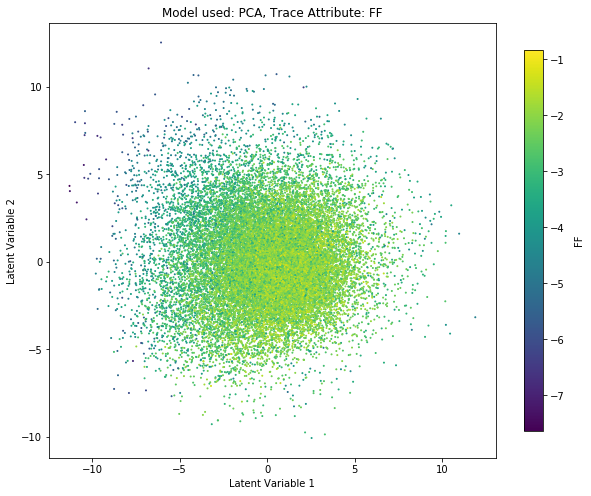

In [5]:
## PCA
pca = PcaModel(input1)
pca.reduce(2)
pca.to_2d(umap_neighbours=5, umap_dist=0.1, verbose=False)
plot_agent(pca, save_path='/Users/hugocoussens/OneDrive - Imperial College London/MSc_Project/standardPCA.png')

ModelAgent initialised

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete



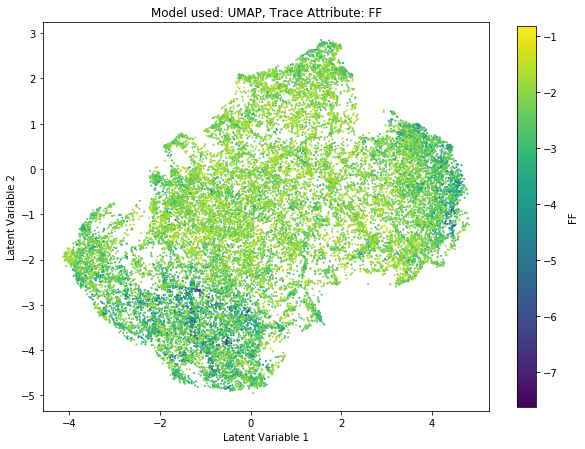

In [6]:
umap = UmapModel(input1)
umap.reduce()
plot_agent(umap)

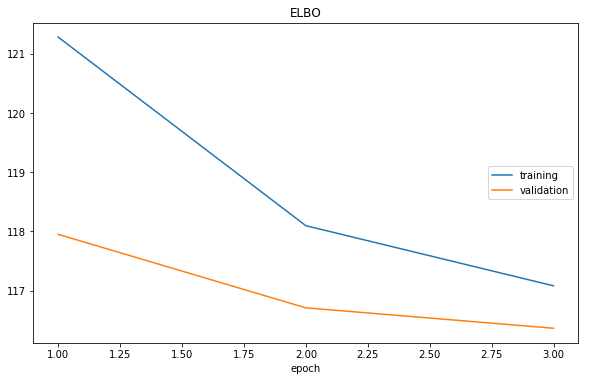

ELBO:
training   (min:  117.082, max:  121.281, cur:  117.082)
validation (min:  116.366, max:  117.952, cur:  116.366)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [7]:
vae = VaeModel(input1)
vae.reduce(epochs=3, hidden_size=2, lr=0.01, plot_loss=True)
vae.to_2d(20, 0.1)

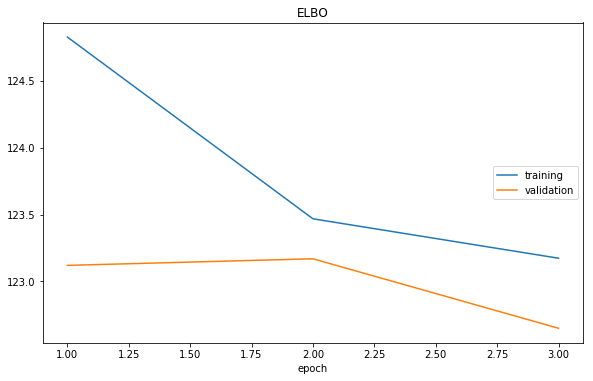

ELBO:
training   (min:  123.174, max:  124.825, cur:  123.174)
validation (min:  122.651, max:  123.169, cur:  122.651)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [9]:
bvae = BVaeModel(input1)
bvae.reduce(epochs=3, hidden_size=2, lr=0.01, beta=3, plot_loss=True)
bvae.to_2d(30, 0.01)

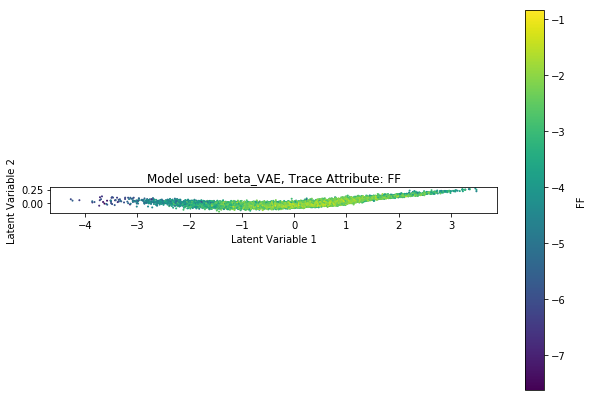

In [10]:
plot_agent(bvae)

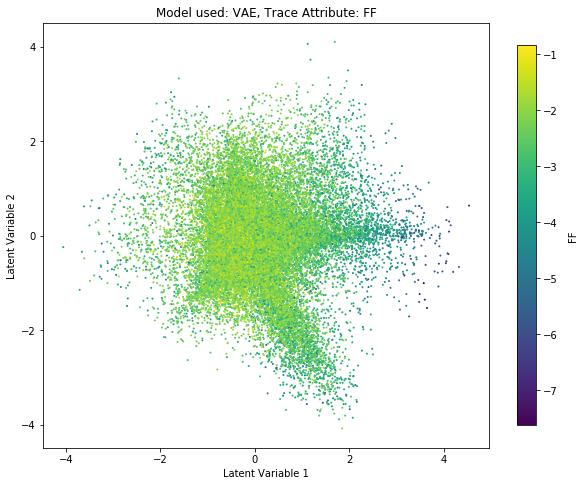

In [11]:
plot_agent(vae)

In [ ]:
# plot_agent(bvae, 'horizon')

In [ ]:
# vae.save_nn('./saved_nn/vae1')

In [ ]:
# loaded = VaeModel(input1)
# loaded.load_nn('./saved_nn/vae1')
# loaded.reduce()

In [ ]:
# loaded.to_2d()

In [ ]:
# plot_agent(loaded)

# Recon loss testing:

In [ ]:
samples = 1000
vec_length = 10
recon = torch.rand((samples,2,vec_length), requires_grad=True)
in1 = torch.rand((samples,2,vec_length))

criterion_mse = nn.MSELoss(size_average=False)

MSE = criterion_mse(recon, in1)

dist = torch.dist(recon, in1, 1)

man_mse = np.sum( np.power(recon.detach().numpy() - in1.detach().numpy(), 2) )

bce = nn.functional.binary_cross_entropy(recon, in1, size_average=False)


print('MSE:', MSE.item(), '\n',
      'dist', dist.item(), '\n',
      'man_mse', man_mse, '\n',
      'bce', man_mse, '\n',
)